# Name: Ronit Kumar Kataria  (06451)
# Email: rk06451@st.habib.edu.pk
# HomeWork title: Homework Assignment 10: Clustering



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import sklearn


In [2]:
df = pd.read_csv('McDonaldsMenu.csv')

<h2> Q1:</h2>
Need to clean the data. Remove columns Category and Item for clustering purpose

In [3]:
df.drop(columns=['Category', 'Item'], inplace=True)

In [4]:
df.columns

Index(['Serving Size', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

<h2> Q2:</h2>
You may drop column Serving Size. If not, then you need to clean the values and get
oz or g values and then remove the units.

In [5]:
# as the serving size input is like in this format 3.9 oz (111 g) so the easiet way I can find is to take the first number and when we find space we stop

df['Serving Size'][104]
a = df['Serving Size'].str.split(' ').str[0]
b = a.str.split('(').str[0]
df['Serving Size'] = b.astype(float)


<h2> Q3:</h2>
Scale (normalize) the data before clustering.

In [6]:
scaler = MinMaxScaler()
scaleDf = scaler.fit_transform(df)


<h2> Q4:</h2>
Generate WSS (Knee Plot) to find optimal number of clusters. You can also plot Silhouette Coefficient plot to support your answer.

In [7]:
wss = []
silhoutScoreDict = {}
for i in range(1, 15):
    tempK = KMeans(n_clusters=i, max_iter=300, random_state=99)
    tempK.fit(scaleDf)
    wss.append(tempK.inertia_)
    if i >= 2:
        tempSilhoutScore = silhouette_score(scaleDf, tempK.labels_, metric='euclidean')
        silhoutScoreDict[i] = tempSilhoutScore


c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

In [8]:
# Printing the SilHout Score
print(silhoutScoreDict)

{2: 0.3095143711410094, 3: 0.33593053110418014, 4: 0.2940148259131284, 5: 0.2752935402688758, 6: 0.2745696494777108, 7: 0.2710746948004917, 8: 0.27296852942877836, 9: 0.2616683074974629, 10: 0.27759892864095514, 11: 0.2671094991784526, 12: 0.2659614023267, 13: 0.26556250530296605, 14: 0.2766193118707565}


<h2> Analysis for Silhout: </h2> 
As we can see that silhout Score for all models and according to this the model which is more closer to 1 is coming when we have value of k = 3 so the optimal value for k would be 3. 

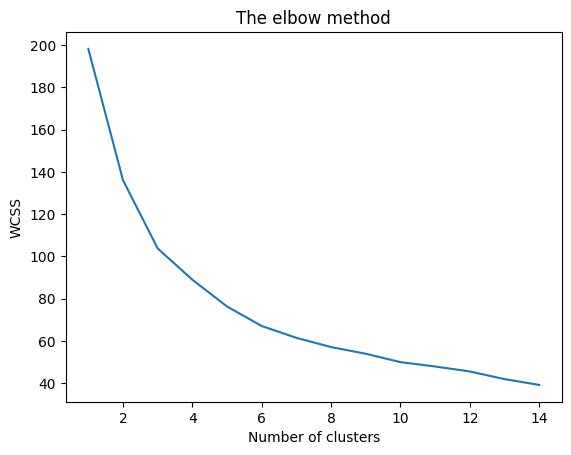

In [9]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


<h2> Analysis for Elbow Method: </h2>
This shows that the last sharp edge is when k = 3 which ultimatly approves our result of Silhout too so optimal value of k is surely going to be 3 

<h2> Q5:</h2>
Perform K-Means clustering again with optimal number of clusters.

In [10]:
optimalKMeans = KMeans(n_clusters=3, max_iter=300, random_state=99)
result = optimalKMeans.fit_predict(scaleDf)
result

c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

<h2> Q6:</h2>
Visualize the clustering results.

Text(0.5, 1.0, 'The actual dataset')

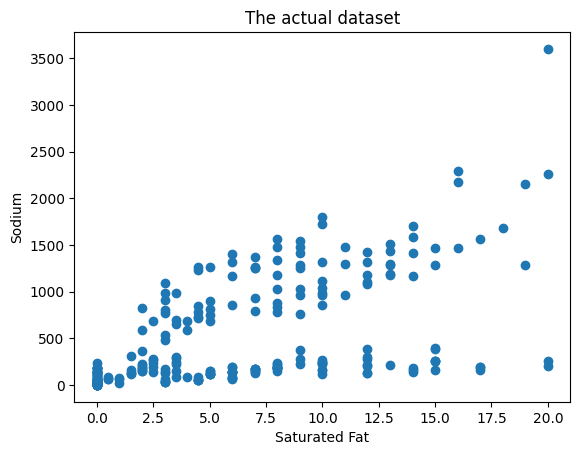

In [11]:
plt.scatter(x=df['Saturated Fat'], y=df['Sodium'])
plt.xlabel('Saturated Fat')
plt.ylabel('Sodium')
plt.title("The actual dataset")


Text(0.5, 1.0, 'The dataset post clustering')

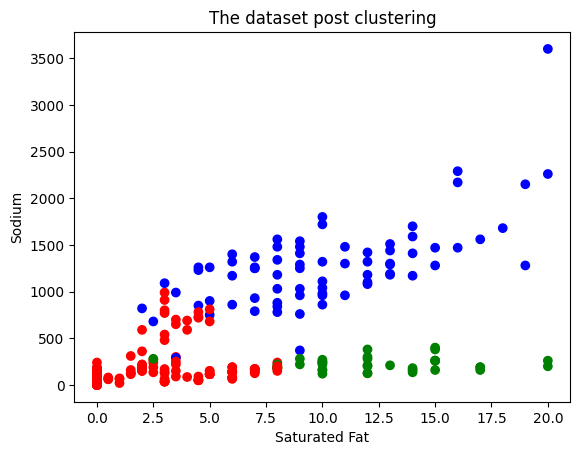

In [12]:
color2 = np.array(['green', 'red', 'blue', 'black', 'orange', 'purple'])
plt.scatter(x=df['Saturated Fat'], y=df['Sodium'], c=color2[optimalKMeans.labels_])
plt.xlabel('Saturated Fat')
plt.ylabel('Sodium')
plt.title("The dataset post clustering")


<h2> Analysis for Psot Clustering: </h2> 
In the above clusters we can see that data is divided into three clusters and all the particular clusters shows the relation that these foods are similar interms of almost all features. 

Second Visualization with Cluster Centroid

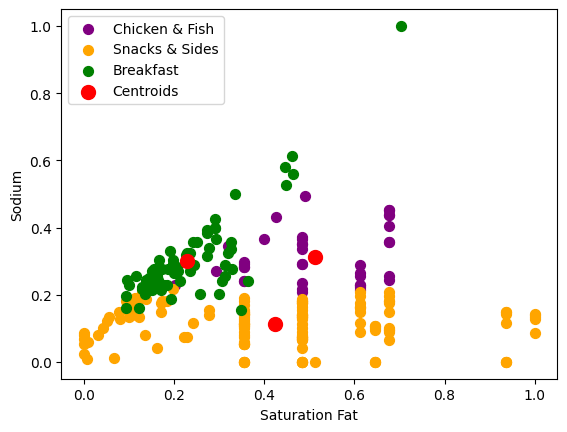

In [13]:
# Visualising the clusters
plt.scatter(scaleDf[result == 0, 0], scaleDf[result == 0, 1], s=50,
            c='purple', label='Chicken & Fish')
plt.scatter(scaleDf[result == 1, 0], scaleDf[result == 1, 1], s=50,
            c='orange', label='Snacks & Sides')
plt.scatter(scaleDf[result == 2, 0], scaleDf[result == 2, 1], s=50,
            c='green', label='Breakfast')

# Plotting the centroids of the clusters
plt.scatter(optimalKMeans.cluster_centers_[:, 0], optimalKMeans.cluster_centers_[
            :, 1], s=100, c='red', label='Centroids')
plt.xlabel('Saturation Fat')
plt.ylabel('Sodium')
plt.legend()


<h2> Analysis for Centroid Clustering: </h2> 

This shows that Breakfast and Snacks are coming together as most of people do eat snacks in the breakfast and the clusters have significant distance between each other which shows that they are not similar to each other. 

<h2> Q7:</h2>
Use cluster labels to your original dataset to create cluster specific data frames.

In [14]:
Cluster1 = df.iloc[result == 0, :]
Cluster2 = df.iloc[result == 1, :]
Cluster3 = df.iloc[result == 2, :]

<h2> Q8:</h2>
Generate at least 3 insights from your clustering results to show unique and
interesting features for each cluster. Discuss your findings.

In [15]:
Cluster1['Saturated Fat'].mean()


12.118421052631579

<AxesSubplot:xlabel='Saturated Fat', ylabel='Count'>

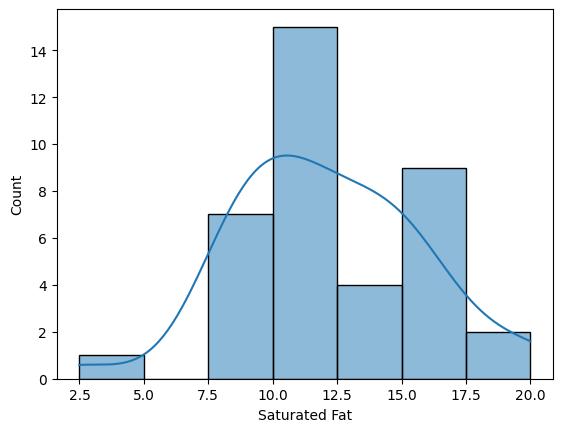

In [16]:
sns.histplot(data=Cluster1, x="Saturated Fat", kde=True)

<h2>Insights-1: </h2>
As we can see that Mean of Saturated Fat in Cluster-1 is very high which means that too much saturated fat can cause cholesterol to build up in your arteries (blood vessels). Saturated fats raise your LDL (bad) cholesterol. High LDL cholesterol increases your risk for heart disease and stroke.

In [17]:
Cluster1['Sodium'].mean()

221.71052631578948

<AxesSubplot:xlabel='Sodium', ylabel='Count'>

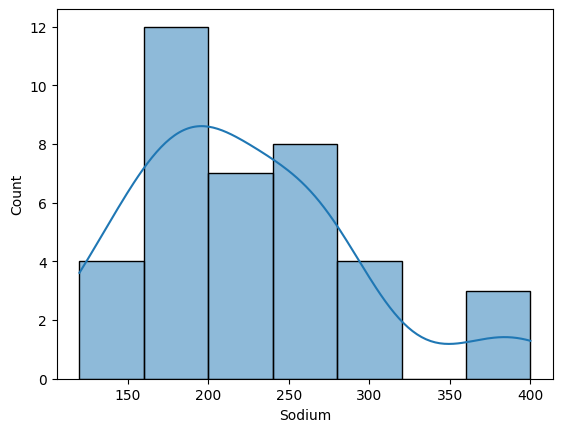

In [18]:
sns.histplot(data=Cluster1, x="Sodium", kde=True)


<h2>Insights-2: </h2>
Sodium helps maintain the body's fluid balance and plays an important role in muscle and nerve function. However, too much sodium may lead to worsening high blood pressure and associated health complications.

In [19]:
Cluster2['Saturated Fat'].mean()

2.377551020408163

In [20]:
Cluster2['Sodium'].mean()


169.7278911564626

In [21]:
Cluster2['Protein'].mean()

6.727891156462585

<AxesSubplot:xlabel='Saturated Fat', ylabel='Count'>

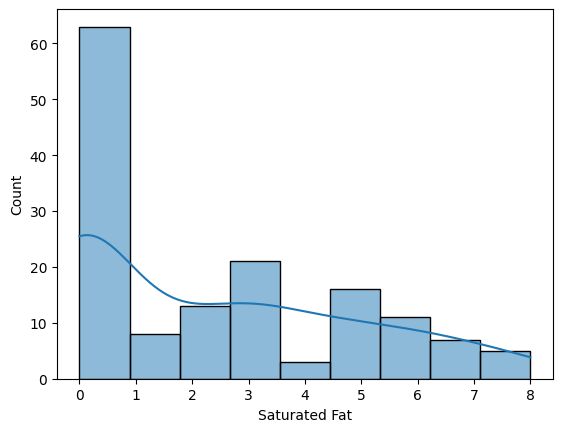

In [22]:
sns.histplot(data=Cluster2, x="Saturated Fat", kde=True)

<h2>Insights-2: </h2>
As we can see that Mean of Saturated Fat in Cluster-1 is relatively low which means that too much saturated fat can cause cholesterol to build up in your arteries (blood vessels). Saturated fats raise your LDL (bad) cholesterol. High LDL cholesterol increases your risk for heart disease and stroke.

<AxesSubplot:xlabel='Sodium', ylabel='Count'>

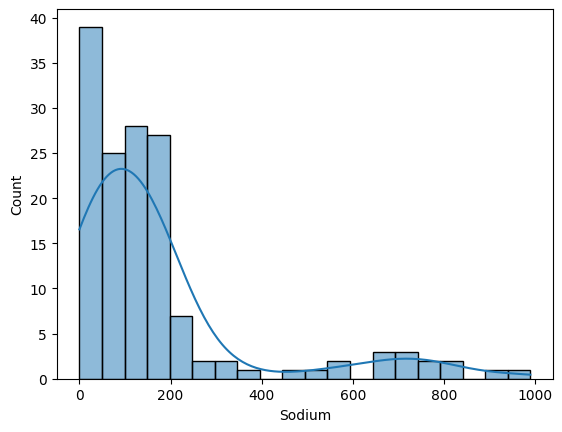

In [23]:
sns.histplot(data=Cluster2, x="Sodium", kde=True)

<h2>Insights-3: </h2>
Cluster 2 shows the low intake of Sodium in it so it can be helpful as it not in excess amount

<AxesSubplot:xlabel='Protein', ylabel='Count'>

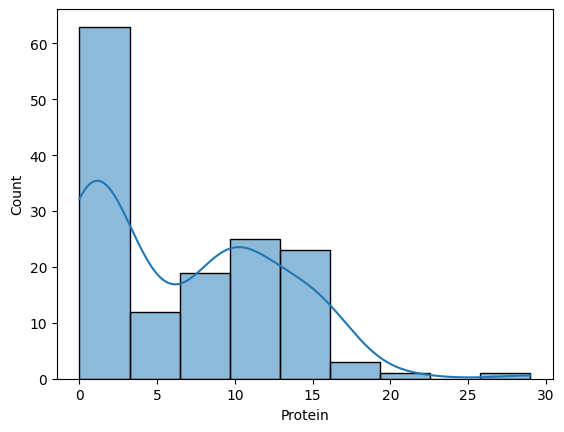

In [24]:
sns.histplot(data=Cluster2, x="Protein", kde=True)

<h2>Insights-4: </h2>
Cluster 2 shows the low intake of Protein in it so it can be helpful as it not in excess amount

In [25]:
Cluster3['Saturated Fat'].mean()

10.026666666666667

<AxesSubplot:xlabel='Saturated Fat', ylabel='Count'>

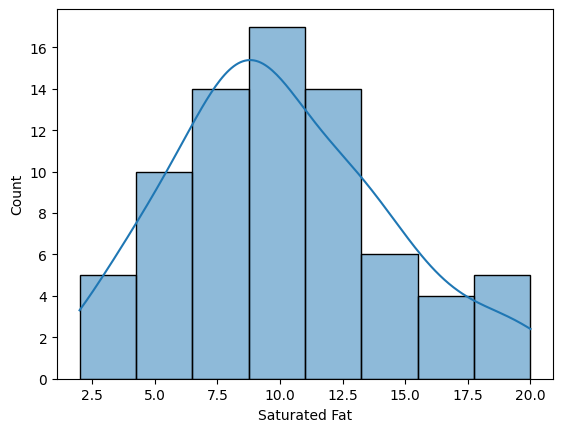

In [26]:
sns.histplot(data=Cluster3, x="Saturated Fat", kde=True)

In [27]:
Cluster3['Sodium'].mean()

1273.6

<AxesSubplot:xlabel='Sodium', ylabel='Count'>

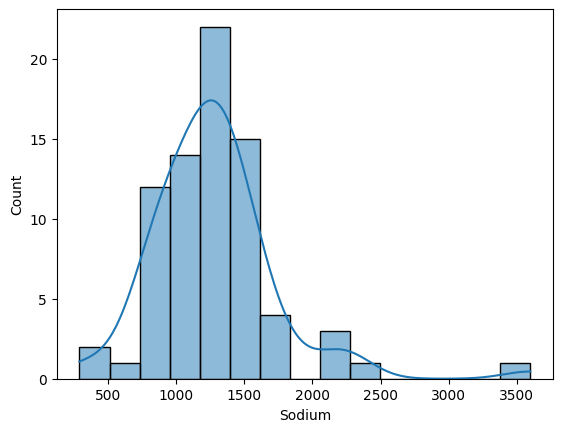

In [28]:
sns.histplot(data=Cluster3, x="Sodium", kde=True)

<h2>Insights-5: </h2>
This shows that cluster 3 has highest and too excesive amount of sodium which means that person must be eating it for  raise in  blood pressure, and high blood pressure is a major risk factor for heart disease and stroke.

In [29]:
Cluster1.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0,38.000000,38.000000
mean,16.897368,588.157895,177.763158,19.776316,30.421053,12.118421,60.421053,0.750000,63.026316,21.026316,...,89.552632,29.815789,0.894737,3.947368,78.131579,13.631579,19.210526,0.0,44.736842,4.500000
std,4.184753,150.725368,52.770505,5.817840,8.967303,3.638076,18.601993,0.415087,19.191055,6.231944,...,26.119991,8.704939,0.689280,2.958701,21.485597,3.619923,5.517333,0.0,12.571276,3.688917
min,7.300000,390.000000,35.000000,3.500000,6.000000,2.500000,12.000000,0.000000,20.000000,7.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,13.600000,452.500000,150.000000,16.000000,25.000000,10.000000,48.250000,0.500000,50.000000,17.000000,...,65.250000,22.000000,0.000000,0.000000,59.250000,11.250000,15.000000,0.0,36.250000,2.000000
50%,16.000000,550.000000,170.000000,19.000000,29.000000,12.000000,59.500000,1.000000,60.000000,20.500000,...,83.000000,28.000000,1.000000,4.500000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,20.000000,685.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,...,109.000000,36.000000,1.000000,6.000000,92.000000,15.750000,23.750000,0.0,50.000000,8.000000
max,22.000000,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


In [30]:
Cluster2.describe()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,14.147619,211.904762,45.034014,5.071429,7.802721,2.377551,11.755102,0.003401,15.544218,5.312925,...,35.374150,11.795918,1.000000,3.911565,27.748299,6.727891,9.523810,10.306122,16.380952,2.843537
std,7.805603,112.375248,48.077764,5.367967,8.220122,2.518148,12.334156,0.041239,15.550726,5.296423,...,20.641828,6.902391,1.205012,4.755567,21.686383,6.027969,21.848273,33.833114,16.423060,4.001200
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.300000,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,7.000000,0.000000,0.000000,5.500000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,16.000000,230.000000,35.000000,4.000000,6.000000,2.000000,10.000000,0.000000,10.000000,3.000000,...,38.000000,13.000000,1.000000,3.000000,28.000000,6.000000,4.000000,0.000000,10.000000,0.000000
75%,20.000000,290.000000,80.000000,9.000000,13.500000,4.500000,22.000000,0.000000,25.000000,9.000000,...,50.000000,17.000000,1.000000,6.000000,45.000000,11.000000,10.000000,2.000000,30.000000,4.000000
max,32.000000,430.000000,180.000000,20.000000,30.000000,8.000000,39.000000,0.500000,85.000000,29.000000,...,79.000000,26.000000,6.000000,23.000000,76.000000,29.000000,170.000000,240.000000,50.000000,15.000000


<h2> Q9:</h2>
Can you suggest a unique name for each cluster? For example if a cluster is showing
high Sugar level, then you can call it a “SugarLovers” cluster.

Cluster 1 has highest amount of saturated fat which can increase the amount of fat in body for person so I would name it "SaturatedLand"

Cluster 2 is relatively good as amount of both saturated fat and sodium is low so I would name it "HealthyZone" so more and more people can eat it without any harm to their body.

In cluster 3 the sodium intake is very high which can shoot up the person's Blood pressure so I would name it "BP Raiser"

